In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\PC\Downloads\archive(2)\anemia_dataset.csv")

In [3]:
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df= df.drop(columns =['Number','Name','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])


In [5]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   %Red Pixel    104 non-null    float64
 1   %Green pixel  104 non-null    float64
 2   %Blue pixel   104 non-null    float64
 3   Hb            104 non-null    float64
 4   Anaemic       104 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [7]:
df['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

<Axes: xlabel='%Red Pixel', ylabel='Count'>

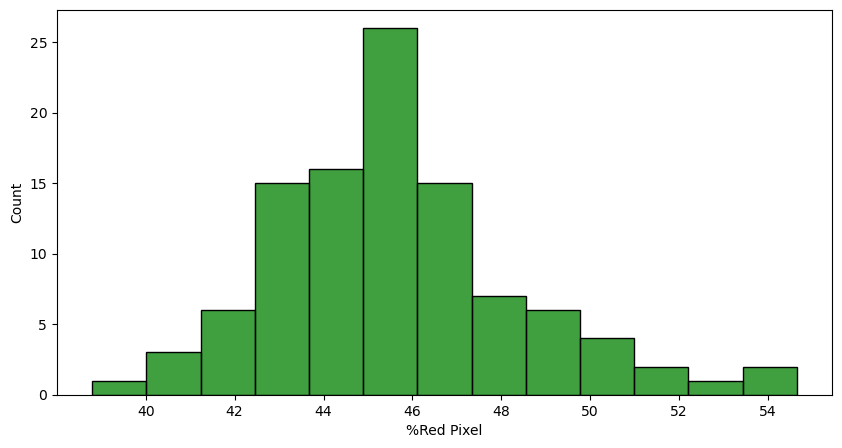

In [8]:
plt.figure(figsize =(10,5))
sns.histplot(data = df, x = '%Red Pixel', color ='green')

<Axes: xlabel='%Green pixel', ylabel='Count'>

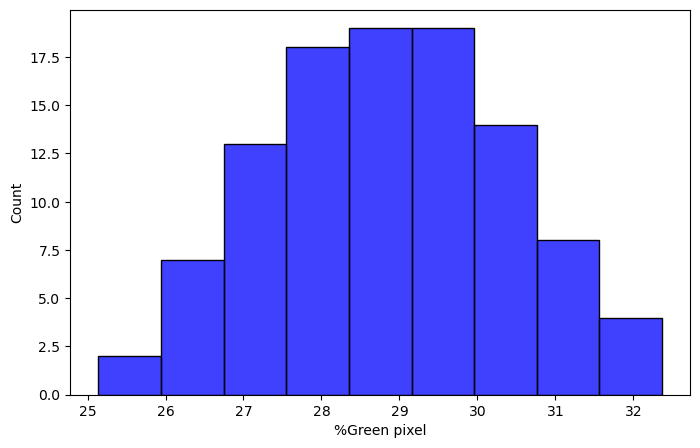

In [9]:
plt.figure(figsize  = (8,5))
sns.histplot(data = df, x ='%Green pixel', color = 'blue')

<Axes: xlabel='%Blue pixel', ylabel='Count'>

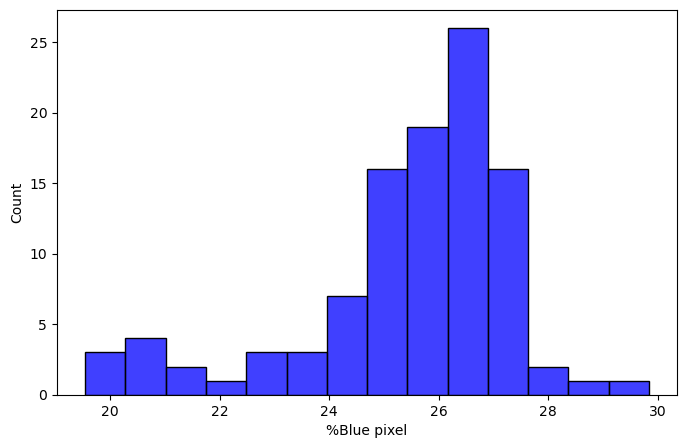

In [10]:
plt.figure(figsize  = (8,5))
sns.histplot(data = df, x ='%Blue pixel', color = 'blue')

<Axes: xlabel='Hb', ylabel='Count'>

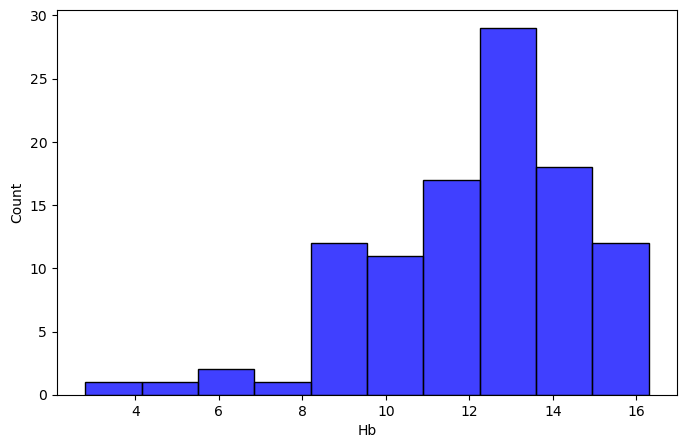

In [11]:
plt.figure(figsize  = (8,5))
sns.histplot(data = df, x ='Hb', color = 'blue')

<Axes: xlabel='Hb', ylabel='Count'>

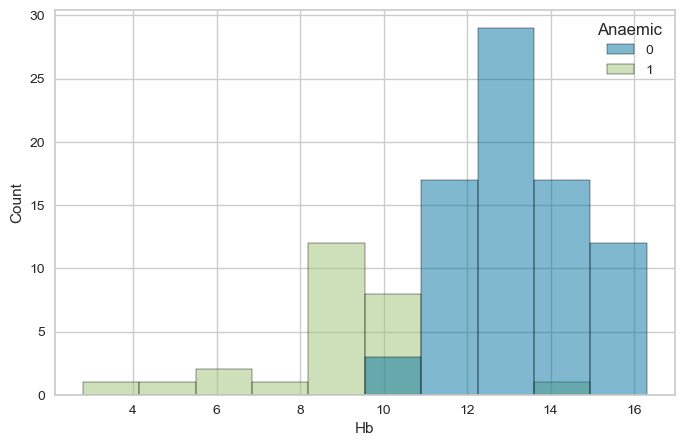

In [24]:
plt.figure(figsize =(8,5))
sns.histplot(data = df, x ='Hb', hue = 'Anaemic')

orang pengidap anemia memiliki Hb yang rendah dibandingkan dengan yang tidak memiliki anemia

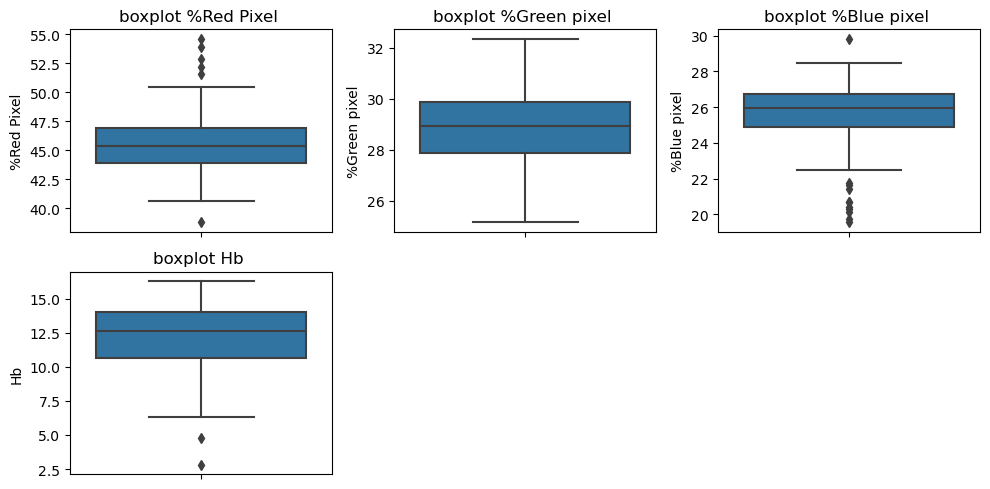

In [12]:
r = df.drop(columns =['Anaemic'])
plt.figure(figsize =(10,5))
for i, column in enumerate(r,1):
    plt.subplot(2, 3, i)
    sns.boxplot(y = df[column])
    plt.title(f'boxplot {column} ')

plt.tight_layout()
plt.show()
    
    

<Axes: >

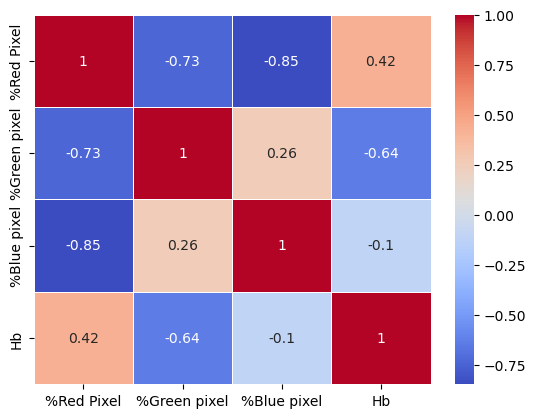

In [13]:
cor = r.corr()
sns.heatmap(data = cor, annot = True, cmap = 'coolwarm',linewidths= 0.5)

In [14]:
df.isna().sum()

%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

df['Anaemic'] = labelencoder.fit_transform(df['Anaemic'])
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,1
100,42.2324,30.6757,27.0919,6.3,1
101,45.6064,31.9084,22.4852,12.7,0
102,45.2095,29.2769,25.5136,13.4,0


In [17]:
from pycaret.classification import setup, compare_models

In [18]:
# Inisialisasi setup PyCaret dengan parameter untuk SMOTE dan pembagian data
clf = setup(
    data=df, 
    target='Anaemic', 
    session_id=123, 
    fix_imbalance=True, 
    train_size=0.8, 
    log_experiment=False,
    experiment_name='Anaemic_Classification'
)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Anaemic
2,Target type,Binary
3,Original data shape,"(104, 5)"
4,Transformed data shape,"(145, 5)"
5,Transformed train set shape,"(124, 5)"
6,Transformed test set shape,"(21, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9625,0.9750,0.9000,0.9667,0.9133,0.8914,0.9055,0.0630
gbc,Gradient Boosting Classifier,0.9625,0.9417,0.9000,0.9667,0.9133,0.8914,0.9055,0.0440
dt,Decision Tree Classifier,0.9500,0.9333,0.9000,0.9333,0.8933,0.8629,0.8800,0.0120
ada,Ada Boost Classifier,0.9500,0.9667,0.9000,0.9333,0.8933,0.8629,0.8800,0.0390
xgboost,Extreme Gradient Boosting,0.9500,0.9542,0.9000,0.9500,0.9000,0.8700,0.8887,0.0220
lightgbm,Light Gradient Boosting Machine,0.9500,0.9667,0.9500,0.9000,0.9200,0.8857,0.8894,0.0280
knn,K Neighbors Classifier,0.9375,0.9750,0.9500,0.8833,0.8933,0.8529,0.8723,0.0170
et,Extra Trees Classifier,0.9375,0.9792,0.9000,0.9167,0.8800,0.8414,0.8632,0.0590
lr,Logistic Regression,0.9264,0.9583,0.9000,0.8833,0.8600,0.8142,0.8388,0.5160
nb,Naive Bayes,0.9264,0.9583,0.9167,0.9067,0.8838,0.8375,0.8603,0.0110


In [21]:
from pycaret.classification import *
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
#trasformation
clf = setup(
    data=df, 
    target='Anaemic', 
    session_id=123, 
    fix_imbalance=True, 
    train_size=0.8, 
    log_experiment=False,
    transformation = True,
    experiment_name='Anaemic_Classification'
)
best_model1 = compare_models()

,Description,Value
0,Session id,123
1,Target,Anaemic
2,Target type,Binary
3,Original data shape,"(104, 5)"
4,Transformed data shape,"(145, 5)"
5,Transformed train set shape,"(124, 5)"
6,Transformed test set shape,"(21, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9750,0.9833,0.9500,0.9667,0.9467,0.9314,0.9400,0.0270
dt,Decision Tree Classifier,0.9625,0.9417,0.9000,0.9667,0.9133,0.8914,0.9055,0.0170
rf,Random Forest Classifier,0.9625,0.9792,0.9000,0.9667,0.9133,0.8914,0.9055,0.0850
ada,Ada Boost Classifier,0.9625,0.9667,0.9000,0.9667,0.9133,0.8914,0.9055,0.0440
gbc,Gradient Boosting Classifier,0.9625,0.9417,0.9000,0.9667,0.9133,0.8914,0.9055,0.0470
xgboost,Extreme Gradient Boosting,0.9500,0.9542,0.9000,0.9500,0.9000,0.8700,0.8887,0.0280
ridge,Ridge Classifier,0.9389,0.9512,0.9000,0.9000,0.8733,0.8356,0.8556,0.0170
et,Extra Trees Classifier,0.9375,0.9833,0.9000,0.9167,0.8800,0.8414,0.8632,0.0580
lda,Linear Discriminant Analysis,0.9264,0.9357,0.9000,0.8833,0.8600,0.8142,0.8388,0.0160
qda,Quadratic Discriminant Analysis,0.8778,0.8857,0.8500,0.7833,0.7767,0.6984,0.7305,0.0170


In [23]:
evaluate_model(best_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…